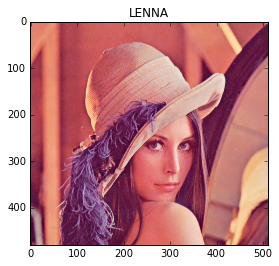

In [7]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lenna.png') #lennaをロード

#matplotlibで表示, matplotlibはRGBでopencvはBGRなのでBとRを逆にして渡す
mpltImg = cv2.merge((img[:, :, 2], img[:, :, 1], img[:, :, 0]))
plt.imshow(mpltImg, 'gray'), plt.title('LENNA')
plt.show()


In [8]:
#画素の操作とか
px = img[100, 100]#(100, 100)のBGRみる
print(px)

blue = img[100, 100, 0] #(100, 100)のBをみる
print(blue)

img[100, 100] = [255, 255, 255] #(100, 100)の値を書き換え
print(img[100, 100])

#注意
#Numpyは高速な配列計算に対して最適化されているので、単に
#１画素ごとにアクセスして書き換えるのはむっちゃ遅いし、がっかりなのでやめましょう
#ノート
#上の方法は普通は一定の領域を選んでくるのに使うのです、例えば最初の5行3列とか
#もしやるならarray.item()とか、array.itemset()とか使う方がまだマシだけど
#スカラーしか扱えないのでBGR全部アクセスするなら、item,itemsetを3回呼ぶ必要あり

print(img.item(10, 10, 2))#(10, 10)の赤画素を表示
img.itemset((10, 10, 2), 100)#(10, 10)の赤画素を100に書き換え
print(img.item(10, 10, 2))#(10, 10)の赤画素を表示

print(img.shape) #(480*512size, 3chの画像)

#ノート
#もし画像がグレースケールなら(row, col)が返ってくるので
#グレー画像かどうかを試すには良い関数です。


print(img.size)#総画素数を表示
print(480*512*3)#row*col*3ch

print( img.dtype)#データ型の確認

#ノート
#opencv python のエラーはむっちゃデータ型に起因するものがおおいので
#デバッグするときは積極的に活用しましょう


[ 78  68 179]
78
[255 255 255]
226
100
(480, 512, 3)
737280
737280
uint8


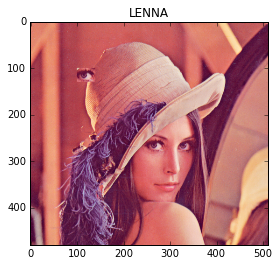

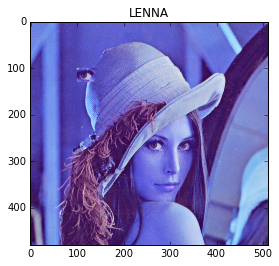

In [11]:
#ROI(Region of interest 注目領域)
eye = img[250:280, 250:290] #250-280行　250-290列を切り出し
img[100:130, 100:140] = eye #イメージの別の領域に移す
#480*512のレナさんだとうまく目が切り出されて、変なところに目が貼り付けられる
#割とホラー

mpltImg = cv2.merge((img[:, :, 2], img[:, :, 1], img[:, :, 0]))
plt.imshow(mpltImg, 'gray'), plt.title('LENNA')
plt.show()

#もしopencvで開くならこっち
#cv2.namedWindow('test') #ウィンドウ作成
#cv2.imshow('test', img) #表示
#cv2.waitKey(0) #入力待ち
#cv2.destroyAllWindows() #クローズ

#色chの分離と統合
b, g, r = cv2.split(img) #3chの色を分離
img = cv2.merge((r, g, b)) #3chの色をマージ(引数はタプルで渡すこと)(rとbを入れ替えてるので割とホラー)

mpltImg = cv2.merge((img[:, :, 2], img[:, :, 1], img[:, :, 0]))
plt.imshow(mpltImg, 'gray'), plt.title('LENNA')
plt.show()

#もしくはこれでも分離できる##こっち推奨##
b=img[:, :, 0]#全行と前列の0chのみ取り出す
g=img[:, :, 1]
r=img[:, :, 2]

#注意
#splitは割と遅いので、インデックスの方を推奨します

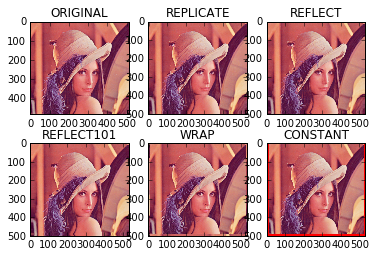

In [12]:
#ボーダーを作る
#フィルタリングとかするとき、端をどう処理するか問題になるんだけど
#このやり方で端を追加すれば万事OK
BLUE = [255, 0, 0]

#端のピクセルを同じ順で複製
replicate = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
#ピクセルを反射して複製
reflect = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_REFLECT)
#一番端は複製せず反射
reflect101 = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
#押し出して回転させる感じ
wrap = cv2.copyMakeBorder(img, 10, 10, 10, 10,cv2.BORDER_WRAP)
#定数で埋める
constant = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=BLUE)

#matlpollibで表示、RGB(opencvはBGR)で表示するのでchが逆になる
#ここで前のセクションで赤青入れ替えたのでそのままにする
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.show()
#しかし、表示しても全然わからんな

